# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
import pandas as pd
mcr=pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding='latin1')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [12]:
want= mcr[['AdjustedCompensation','FormalEducation']]

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [13]:
want.groupby('FormalEducation').describe()

AdjustedCompensation  \
                                                                  count   
FormalEducation                                                           
Bachelor's degree                                                1107.0   
Doctoral degree                                                   967.0   
I did not complete any formal education past hi...                 30.0   
I prefer not to answer                                              7.0   
Master's degree                                                  1990.0   
Professional degree                                               130.0   
Some college/university study without earning a...                111.0   

                                                                  \
                                                            mean   
FormalEducation                                                    
Bachelor's degree                                   6.488710e+04   
Doctoral degree                                     2.956618e+07   
I did not complete any formal education past hi...  5.931777e+04   
I prefer not to answer                              2.228557e+05   
Master's degree                                     6.913990e+04   
Professional degree                                 6.120670e+04   
Some college/university study without earning a...  8.291218e+04   

                                                                  \
                                                             std   
FormalEducation                                                    
Bachelor's degree                                   3.069359e+05   
Doctoral degree                                     9.099981e+08   
I did not complete any formal education past hi...  5.842303e+04   
I prefer not to answer                              3.720622e+05   
Master's degree                                     1.355272e+05   
Professional degree                                 7.536859e+04   
Some college/university study without earning a...  2.296962e+05   

                                                                            \
                                                             min       25%   
FormalEducation                                                              
Bachelor's degree                                       0.000000  11266.20   
Doctoral degree                                       -73.516311  40000.00   
I did not complete any formal education past hi...      0.000000  11210.81   
I prefer not to answer                              36720.000000  55000.00   
Master's degree                                         0.000000  21868.00   
Professional degree                                     0.000000  17237.00   
Some college/university study without earning a...      0.000000  11811.32   

                                                                           \
                                                          50%         75%   
FormalEducation                                                             
Bachelor's degree                                   38399.400   80231.000   
Doctoral degree                                     74131.920  120000.000   
I did not complete any formal education past hi...  39133.216   92999.560   
I prefer not to answer                              83707.820  134843.475   
Master's degree                                     53812.170   92000.000   
Professional degree                                 40000.000   88431.868   
Some college/university study without earning a...  40986.000  109958.235   

                                                                  
                                                             max  
FormalEducation                                                   
Bachelor's degree                                   9.999999e+06  
Doctoral degree                                     2.829740e+10  
I did not complete any formal education past hi... 

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1e-06)

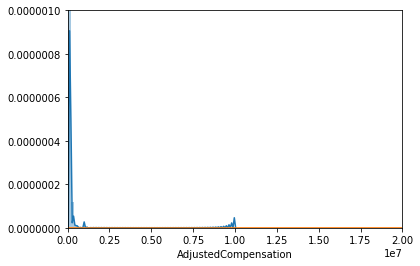

In [47]:

# want.dropna(inplace=True)
bach=want['AdjustedCompensation'].loc[want['FormalEducation']=='Bachelor\'s degree']
doct=want['AdjustedCompensation'].loc[want['FormalEducation']=='Doctoral degree']
sns.distplot(bach)
sns.distplot(doct)
plt.xlim((0,20000000))
plt.ylim((0,.000001))

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!